데이터 설명 : 

영업 및 광고 데이터셋은 일반적으로 영업 성과, 광고 지출, 다양한 채널의 마케팅 노력과 관련된 과거 데이터를 포함합니다. 이 데이터셋에는 TV, 라디오, 온라인, 인쇄물 등 플랫폼별 광고 예산 할당, 판매 수익, 대상 고객 인구 통계, 캠페인 시작 및 종료일, 지리적 지역과 같은 특징들이 포함됩니다. 이 데이터셋은 광고 전략이 판매에 미치는 영향을 분석하고, A/B 테스트를 수행하며, 마케팅 예산을 최적화하고, 미래 판매 동향을 예측하는 데 매우 유용합니다. 주로 회귀 모델링, 고객 세분화, ROI 측정과 같은 머신러닝 및 데이터 분석 작업에 활용됩니다.

여기서 내가 해볼만한 작업들:

- 판매 예측 모델 구축: 미래 판매량을 예측하는 모델을 개발
- 광고 채널별 성과 분석 및 예산 최적화: 각 광고 채널(TV, 라디오, 온라인 등)의 판매 기여도를 분석하고, 총 판매 수익을 극대화하기 위한 최적의 예산 배분 전략을 수립
- 주요 판매 영향 요인 식별: 판매량에 가장 큰 영향을 미치는 광고 지출, 프로모션, 계절성 등 다양한 요인들을 분석하여 핵심 동인을 파악
- 광고 캠페인 효과 측정 및 A/B 테스트: 특정 광고 캠페인의 판매 증대 효과를 측정하고, 다양한 광고 메시지나 전략의 A/B 테스트를 통해 가장 효과적인 방안을 도출
- 광고 지출 대비 수익률(ROAS) 분석: 광고 투자 대비 얻은 수익을 정량적으로 분석하여 마케팅 효율성을 평가

In [2]:
import pandas as pd
import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mahmoudshaheen1134/sales-and-advertising-clean-dataset")

# Assuming the dataset contains a single CSV file, find it and load it into a pandas DataFrame
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
file_path = os.path.join(path, csv_files[0])
df = pd.read_csv(file_path)

# 순서 반영해서 인코딩하기
from pandas.api.types import CategoricalDtype

influencer_order = ['Nano', 'Micro', 'Macro', 'Mega']
cat_type = CategoricalDtype(categories=influencer_order, ordered=True)

df['influencer'] = df['influencer'].astype(cat_type)
df['influencer_encoded'] = df['influencer'].cat.codes  # 0, 1, 2, 3

In [3]:
# 매출에 영향을 미치는 다른 요인들이 빠져서 아쉽긴한데, 그래도 가지고 있는 걸로 분석해보기

In [11]:
import statsmodels.formula.api as smf

lr_reg = smf.ols(formula="sales ~ tv + radio + social_media + influencer_encoded", data=df).fit()

lr_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.129e+06
Date:                Fri, 21 Nov 2025   Prob (F-statistic):               0.00
Time:                        18:11:22   Log-Likelihood:                -42768.
No. Observations:                4546   AIC:                         8.555e+04
Df Residuals:                    4541   BIC:                         8.558e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -180.5640    118.128     -1.529      0.126    -412.153      51.025
tv                     3.5626      0.003   1051.066      0.000       3.556       3.569
radio                 -0.0040      0.010     -0.404      0.686      -0.023       0.015
social_media           0.0045      0.025      0.181      0.856      -0.044       0.053
influencer_encoded    31.2981     39.055      0.801      0.423     -45.268     107.864
==============================================================================
Omnibus:                        0.066   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.968   Jarque-Bera (JB):                0.041
Skew:                          -0.001   Prob(JB):                        0.980
Kurtosis:                       3.015   Cond. No.                     1.74e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

X = pd.get_dummies(df.drop("sales", axis=1), drop_first=True)
X_numeric = X.select_dtypes(include=[np.number])

# X는 독립변수들의 데이터프레임
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data.sort_values('VIF', ascending=False)

vif_result = calculate_vif(X_numeric)
print(vif_result)
# VIF > 10: 높은 다중공선성
# VIF > 5: 중간 수준의 다중공선성

              Feature        VIF
1               radio  21.142448
0                  tv  19.272028
2        social_media   5.029035
3  influencer_encoded   2.120042


VIF 결과 해석 📊

**📌 VIF 기준**

| VIF 범위 | 상태 |
|---|---|
| VIF < 5 | 문제 없음 ✅ |
| 5 ≤ VIF < 10 | 중간 정도 다중공선성 ⚠️ |
| VIF ≥ 10 | 높은 다중공선성 ⛔ |

**🔍 분석 결과**

| 변수 | VIF | 상태 | 의미 |
|---|---|---|---|
| radio | 21.14 | ⛔ 심각 | 다른 변수들로 radio의 95% 설명 가능 |
| tv | 19.27 | ⛔ 심각 | 다른 변수들로 tv의 95% 설명 가능 |
| social_media | 5.03 | ⚠️ 경미 | 약간 높지만 괜찮은 수준 |
| influencer_encoded | 2.12 | ✅ 정상 | 문제 없음 |

**💡 해석**

*   `radio`와 `tv`는 서로 강하게 연관되어 있으며, 중복된 정보를 제공합니다.
*   이는 TV 광고를 많이 하는 기업이 라디오 광고도 많이 하는 패턴과 같은 현상에서 비롯될 수 있습니다.

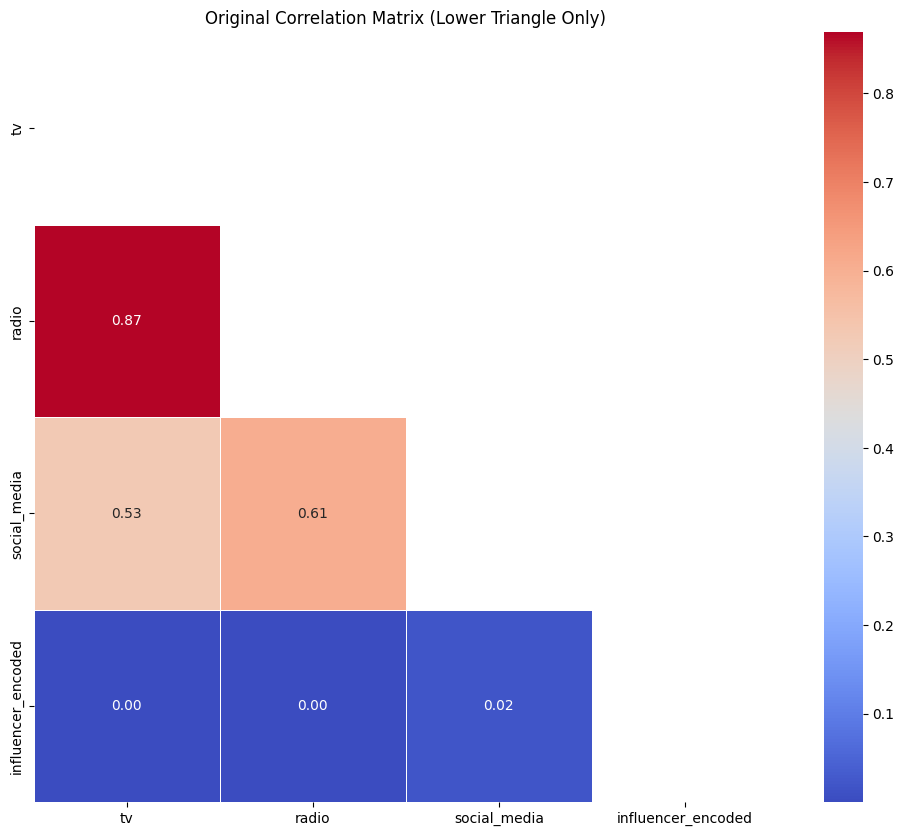

제거 대상 변수: ['radio']


In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 상관계수 행렬 확인
corr_matrix = X_numeric.corr().abs()

# 원본 상관계수 행렬 시각화
plt.figure(figsize=(12, 10))
# 겹치는 부분을 가리기 위해 마스크 생성 (상단 삼각형과 대각선)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
plt.title('Original Correlation Matrix (Lower Triangle Only)')
plt.show()

# 상관계수 > 0.8인 변수 쌍 찾기
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# 제거할 변수 찾기
to_drop = [column for column in upper_triangle.columns 
           if any(upper_triangle[column] > 0.8)]

print(f"제거 대상 변수: {to_drop}")

# 다중 공선성 신경 써야 하나?

| 측정 지표           | 다중공선성 영향 없음 ✅ | 다중공선성 영향 있음 ⚠️ |
| :------------------ | :---------------------- | :---------------------- |
| 계수 추정치 (β̂)     | 편향 없음               | -                       |
| 표준오차 (SE)       | -                       | 커짐 ↑                  |
| t-통계량            | -                       | 작아짐 ↓                |
| p-value             | -                       | 커짐 ↑                  |
| 신뢰구간            | -                       | 넓어짐                  |